In [1]:
%cd ..
%cd data

/Users/yuqingwang/Desktop/Time Series Final
/Users/yuqingwang/Desktop/Time Series Final/data


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import datetime
from scipy.stats import kurtosis
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf

In [3]:
FB_Stock = pd.read_excel('High_Frequency_Data.xlsx',sheet_name=3)
FB_Stock

,Date,Open,High,Low,Close,Volume
0,2019-12-16 11:50:00,196.870,196.9800,196.6178,196.7900,193800
1,2019-12-16 11:40:00,197.240,197.2724,196.8500,196.8590,267280
2,2019-12-16 11:30:00,197.740,197.7811,197.2200,197.2556,207431
3,2019-12-16 11:20:00,197.700,197.8900,197.5100,197.7500,186657
4,2019-12-16 11:10:00,198.175,198.2100,197.6100,197.6800,217699
...,...,...,...,...,...,...
2843,2019-09-03 10:10:00,183.980,184.2690,183.8200,183.9300,196396
2844,2019-09-03 10:00:00,184.980,185.0600,183.6600,183.9900,372528
2845,2019-09-03 09:50:00,185.290,185.4700,184.9700,185.0258,170776
2846,2019-09-03 09:40:00,185.500,185.6700,184.8000,185.2500,275100


In [4]:
FB_Stock['Date'] = pd.to_datetime(FB_Stock['Date'])

In [5]:
FB_Stock.set_index(['Date'],inplace=True)

In [6]:
FB_Stock.sort_index(inplace=True)

In [7]:
FB_Stock.index.date

array([datetime.date(2019, 9, 3), datetime.date(2019, 9, 3),
       datetime.date(2019, 9, 3), ..., datetime.date(2019, 12, 16),
       datetime.date(2019, 12, 16), datetime.date(2019, 12, 16)],
      dtype=object)

In [8]:
FB_Stock.loc[FB_Stock.index.date < pd.to_datetime('2019-11-18')]

,Open,High,Low,Close,Volume
Date,,,,,
2019-09-03 09:30:00,184.0000,185.6286,183.86,185.5500,528157
2019-09-03 09:40:00,185.5000,185.6700,184.80,185.2500,275100
2019-09-03 09:50:00,185.2900,185.4700,184.97,185.0258,170776
2019-09-03 10:00:00,184.9800,185.0600,183.66,183.9900,372528
2019-09-03 10:10:00,183.9800,184.2690,183.82,183.9300,196396
...,...,...,...,...,...
2019-11-15 15:10:00,194.7300,194.7600,194.56,194.7000,98785
2019-11-15 15:20:00,194.6927,194.7900,194.63,194.7000,108485
2019-11-15 15:30:00,194.7100,195.0000,194.65,194.9900,135759


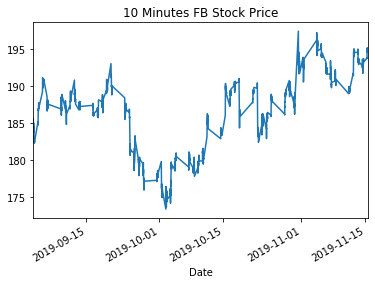

In [9]:
_ = FB_Stock.loc[FB_Stock.index.date < pd.to_datetime('2019-11-18')]['Close'].plot()
_ = plt.title('10 Minutes FB Stock Price')
#_ = plt.savefig('graph/10 Minutes FB Stock Price')

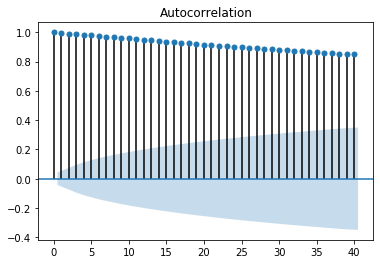

In [10]:
_ = sm.graphics.tsa.plot_acf(FB_Stock.loc[FB_Stock.index.date < pd.to_datetime('2019-11-18')]['Close'].values, lags=40)

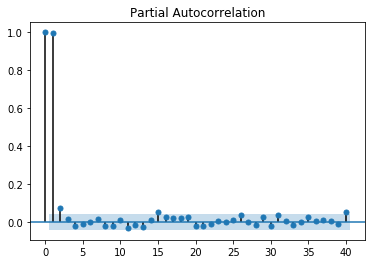

In [11]:
_ = sm.graphics.tsa.plot_pacf(FB_Stock.loc[FB_Stock.index.date < pd.to_datetime('2019-11-18')]['Close'].values, lags=40)

In [12]:
FB_Stock = pd.read_csv('../data/FB.csv')
FB_Stock['Date'] = pd.to_datetime(FB_Stock['Date'])
FB_Stock.set_index(['Date'],inplace=True)
FB_Stock = FB_Stock['Close']
FB_Stock

Date
2016-01-04    102.220001
2016-01-05    102.730003
2016-01-06    102.970001
2016-01-07     97.919998
2016-01-08     97.330002
                 ...    
2019-12-16    197.919998
2019-12-17    198.389999
2019-12-18    202.500000
2019-12-19    206.059998
2019-12-20    206.300003
Name: Close, Length: 1000, dtype: float64

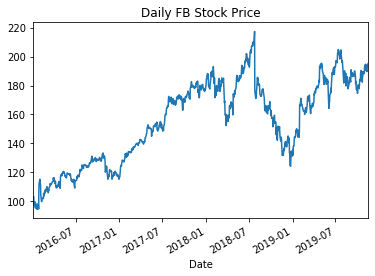

In [13]:
_ = FB_Stock.loc[FB_Stock.index.date < pd.to_datetime('2019-11-18')].plot()
_ = plt.title('Daily FB Stock Price')
#_ = plt.savefig('graph/Daily FB Stock Price')

# log return

In [14]:
FB_Stock_return = np.log(FB_Stock/FB_Stock.shift())

In [15]:
FB_Stock_return.dropna(inplace = True)

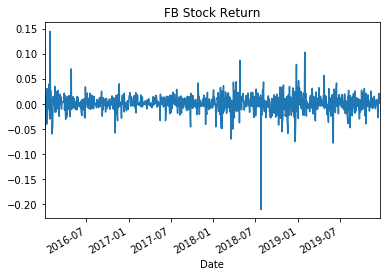

In [16]:
_ = FB_Stock_return.plot()
_ = plt.title('FB Stock Return')
#_ = plt.savefig('graph/FB Stock Return')

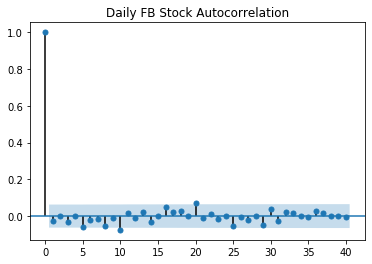

In [17]:
_ = sm.graphics.tsa.plot_acf(FB_Stock_return.loc[FB_Stock_return.index.date < pd.to_datetime('2019-11-18')], lags=40,
                             title = 'Daily FB Stock Autocorrelation')

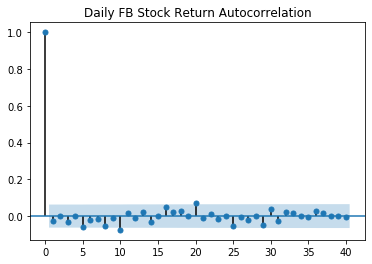

In [18]:
_ = sm.graphics.tsa.plot_acf(FB_Stock_return.loc[FB_Stock_return.index.date < pd.to_datetime('2019-11-18')], lags=40,
                              title = 'Daily FB Stock Return Autocorrelation')
#_ = plt.savefig('graph/Daily FB Stock Return Autocorrelation')

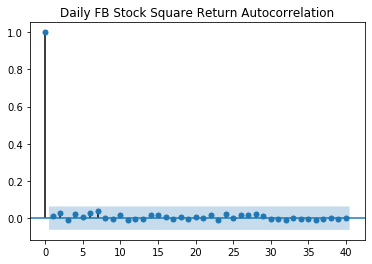

In [19]:
_ = sm.graphics.tsa.plot_acf(FB_Stock_return.loc[FB_Stock_return.index.date < pd.to_datetime('2019-11-18')]**2, lags=40,
                              title = 'Daily FB Stock Square Return Autocorrelation')
#_ = plt.savefig('graph/Daily FB Stock Square Return Autocorrelation')

In [20]:
volList = FB_Stock_return.loc[FB_Stock_return.index.date < pd.to_datetime('2019-11-18')].rolling(20).std(ddof=1)

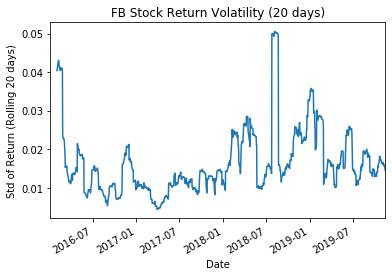

In [21]:
_ = volList.plot()
_ = plt.title('FB Stock Return Volatility (20 days)')
_ = plt.ylabel('Std of Return (Rolling 20 days)')
#_ = plt.savefig('graph/Std of Return (Rolling 20 days)')

In [22]:
kurtosis(FB_Stock_return.loc[FB_Stock_return.index.date < pd.to_datetime('2019-11-18')])

23.289586380907306